# Abalone Age Prediction Model

## Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Importing the required libraries:

In [440]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [441]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## EDA (Exploratory Data Analysis)

In [442]:
df.shape

(4177, 9)

We have 4177 rows and 9 columns in this dataset

In [443]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [444]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

All the Columns are float expect Sex column which is Object which needs to converted

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [446]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We can see there are no null values in this dataset

Before Doing Statistical summary, lets convert Sex column using label encoder which is object type

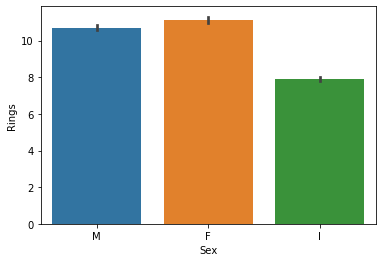

In [447]:
sns.barplot(x="Sex",y="Rings",data=df)
plt.show()

In [448]:
#Label encoding Sex column
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [449]:
# 0 = Female , 1 = Infant , 2 = Male
#since we know label encoder works Alphabetically
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Descriptive analysis or summary statistics

Now we start statistical analysis , since all the columns are int or float

In [450]:
#statistical summary
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [451]:
#lets check for correlation among all the columns
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [452]:
#lets check for skewness of the columns
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

## Data Visualization:

### Univariate Analysis

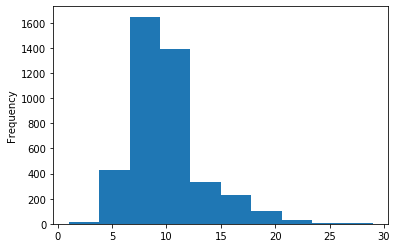

In [453]:

df['Rings'].plot.hist()
plt.show()

Data is Right Skewed for the above column

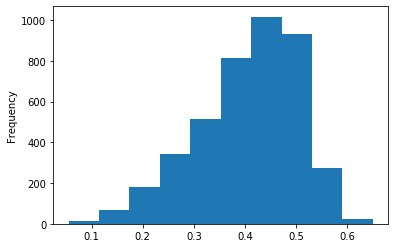

In [454]:
df['Diameter'].plot.hist()
plt.show()

Data is left Skewed for the above column

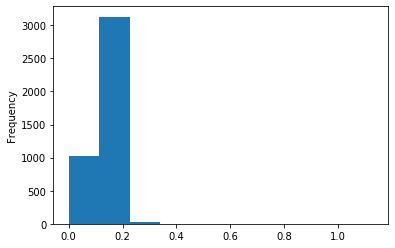

In [455]:
df['Height'].plot.hist()
plt.show()

Data is Right Skewed for the above column

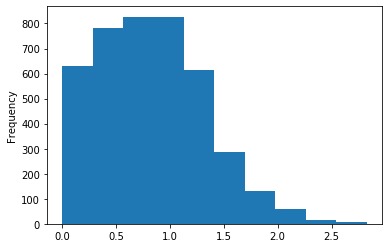

In [456]:
df['Whole weight'].plot.hist()
plt.show()


Data is Right Skewed for the above column

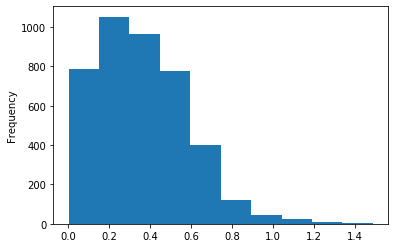

In [457]:

df['Shucked weight'].plot.hist()
plt.show()


Data is Right Skewed for the above column

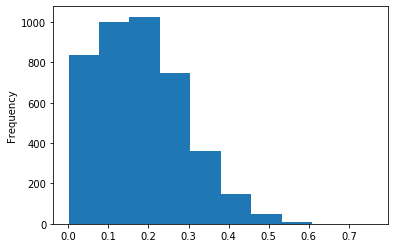

In [458]:

df['Viscera weight'].plot.hist()
plt.show()

Data is Right Skewed for the above column

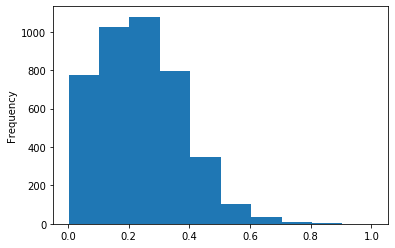

In [459]:

df['Shell weight'].plot.hist()
plt.show()

Data is Right Skewed for the above column

## Bivariate Analysis

In [460]:
#lets make a scatter plot for All the columns againt Target variable

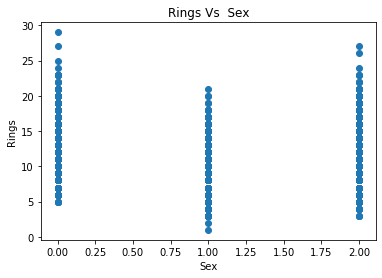

In [461]:

#Lets plot this column against the target variable
plt.scatter(df['Sex'],df['Rings'])
plt.xlabel('Sex')
plt.ylabel('Rings')
plt.title('Rings Vs  Sex')
plt.show()


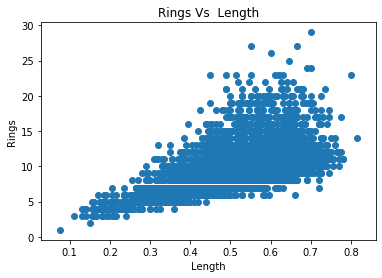

In [462]:
#Lets plot this column against the target variable
plt.scatter(df['Length'],df['Rings'])
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title('Rings Vs  Length')
plt.show()



We can see high positive correlation between these columns

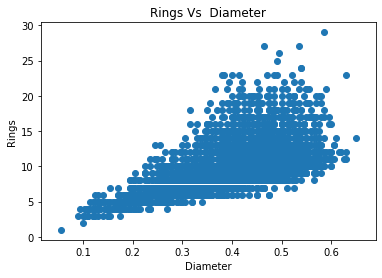

In [463]:
#Lets plot this column against the target variable
plt.scatter(df['Diameter'],df['Rings'])
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.title('Rings Vs  Diameter')
plt.show()



We can see high positive correlation between these columns

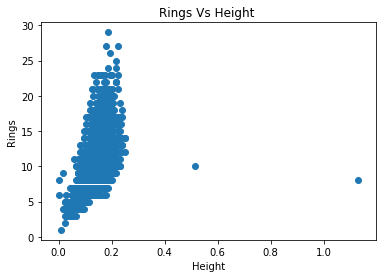

In [464]:

#Lets plot this column against the target variable
plt.scatter(df['Height'],df['Rings'])
plt.xlabel('Height')
plt.ylabel('Rings')
plt.title('Rings Vs Height ')
plt.show()

We can see very high positive correlation between these columns

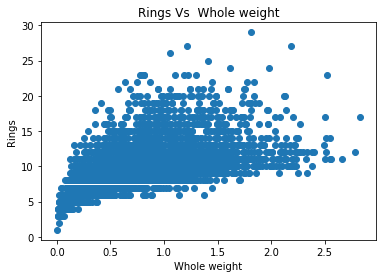

In [465]:
#Lets plot this column against the target variable
plt.scatter(df['Whole weight'],df['Rings'])
plt.xlabel('Whole weight')
plt.ylabel('Rings')
plt.title('Rings Vs  Whole weight')
plt.show()




We can see high positive correlation between these columns

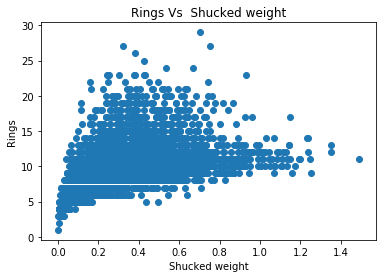

In [466]:


#Lets plot this column against the target variable
plt.scatter(df['Shucked weight'],df['Rings'])
plt.xlabel('Shucked weight')
plt.ylabel('Rings')
plt.title('Rings Vs  Shucked weight')
plt.show()



We can see high positive correlation between these columns

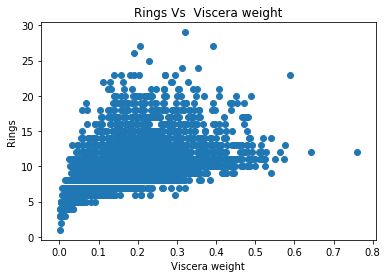

In [467]:
#Lets plot this column against the target variable
plt.scatter(df['Viscera weight'],df['Rings'])
plt.xlabel('Viscera weight')
plt.ylabel('Rings')
plt.title('Rings Vs  Viscera weight')
plt.show()




We can see high positive correlation between these columns

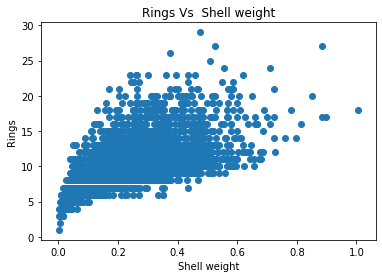

In [468]:
#Lets plot this column against the target variable
plt.scatter(df['Shell weight'],df['Rings'])
plt.xlabel('Shell weight')
plt.ylabel('Rings')
plt.title('Rings Vs  Shell weight')
plt.show()



We can see high positive correlation between these columns

### MultiVariate Analysis:

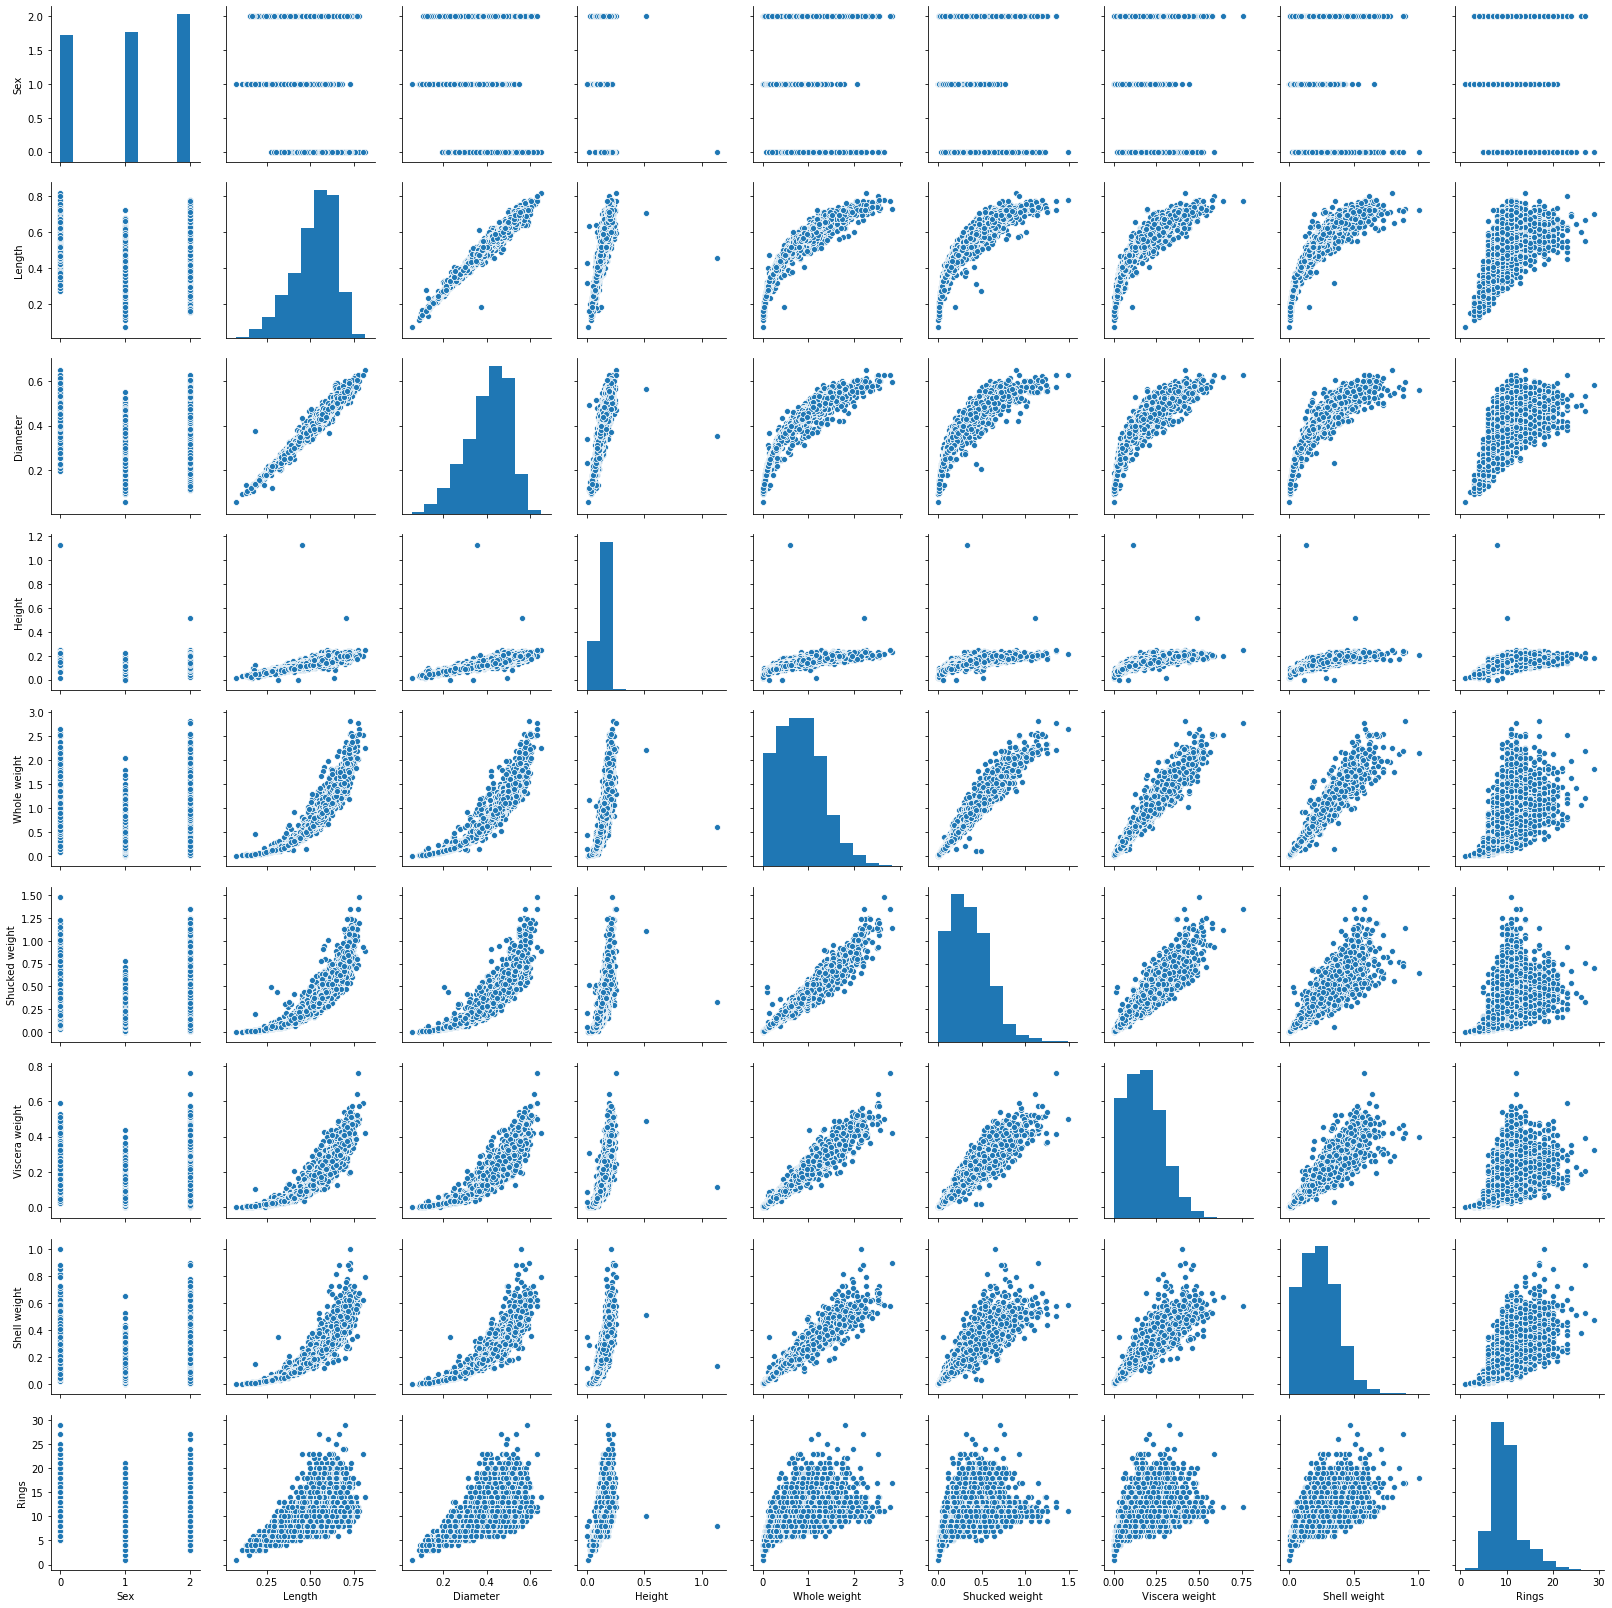

In [469]:
#lets make pairplot to get all columns plotted againt every other column
sns.pairplot(df)
plt.show()

We can all the columns distribution with each each using pairplot

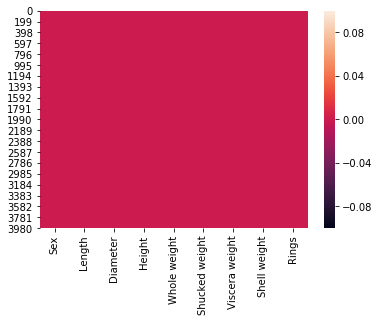

In [470]:
#checking the missing values with visualization technique
sns.heatmap(df.isnull())
plt.show()

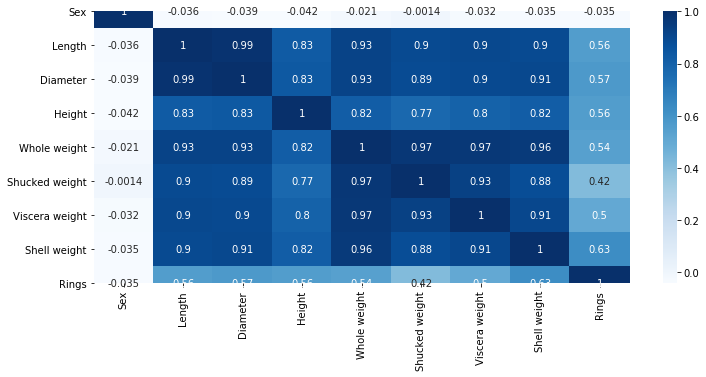

In [471]:
#correlation
fig = plt.figure(figsize=(12,5))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

All the Input columns are having correlation with each other, we can drop some columns since all are providing same info

In [472]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['Rings'].sort_values(ascending = False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

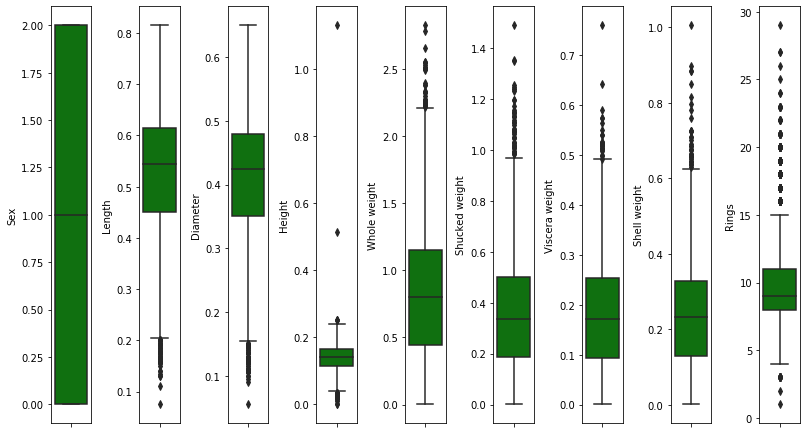

In [473]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

We cann see outliers are present in almost every columns

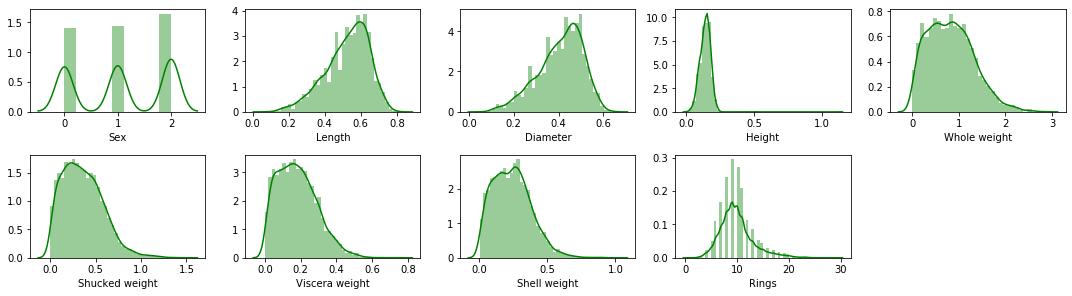

In [474]:
# Lets check the distribution
collist =df.columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Data is Slightly normal distributed for some columns and Rights skewed left and right skewed for others

## Data Preprocessing

In [475]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 3)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 3)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [476]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [477]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [478]:
#Lets remove the outliers below columns using IQR method outliers_normally function, Since these columns are slightly normal distributed
skewed_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']
for i in skewed_columns:
    outliers_normally(df,i)

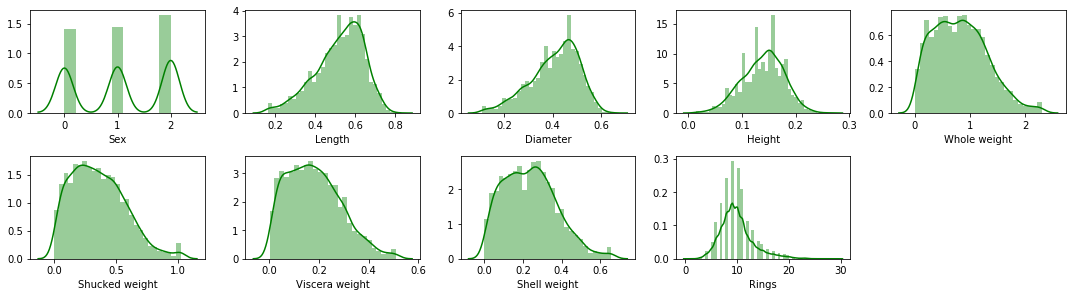

In [479]:
# Lets check the distribution
collist =df.columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Now data is slightly normal distributed

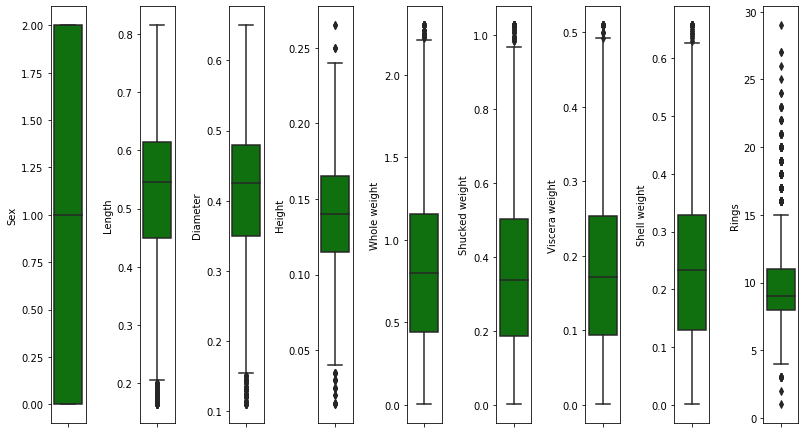

In [480]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

After Replacing the 0utliers with Lower and upper Boundary for these columns, we can see  some outlier

## Zscore method to remove outliers

In [481]:
df.shape

(4177, 9)

In [482]:
#Now lets use Zscore method to remove remaining outliers
#we can use zscore method, since all the data is now noramlly distributed

In [483]:
z = np.abs(zscore(df))
df_new  = df[(z<3).all(axis=1)]
df_new.shape

(4022, 9)

Now the ouliers have been removed and data loss is also very less

## Skewness Reduction

In [484]:
#skewness Reduction
#lets devide X and Y before handing skewness
Y = df_new['Rings']
X = df_new.drop('Rings',axis = 1)

In [485]:
X.skew()

Sex              -0.095470
Length           -0.622612
Diameter         -0.596899
Height           -0.234425
Whole weight      0.327735
Shucked weight    0.450601
Viscera weight    0.434973
Shell weight      0.344857
dtype: float64

In [486]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = X.columns
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X.skew()

Sex              -0.095470
Length           -0.083819
Diameter         -0.081035
Height           -0.234425
Whole weight      0.327735
Shucked weight    0.450601
Viscera weight    0.434973
Shell weight      0.344857
dtype: float64

Now skewness is in range for all the columns

## Data Scaling

In [487]:
#Lets scale the data using minmax scaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.325242,0.348458,0.311111,0.222322,0.217936,0.204268,0.226209
1,1.0,0.179401,0.175783,0.288889,0.092221,0.092685,0.097561,0.101404
2,0.0,0.453338,0.465336,0.488889,0.295829,0.250000,0.286585,0.319813
3,1.0,0.302132,0.348458,0.444444,0.223224,0.208918,0.230691,0.234009
4,0.5,0.155587,0.161046,0.244444,0.082976,0.082665,0.079268,0.078003


Now all the data is in range of 0 to 1

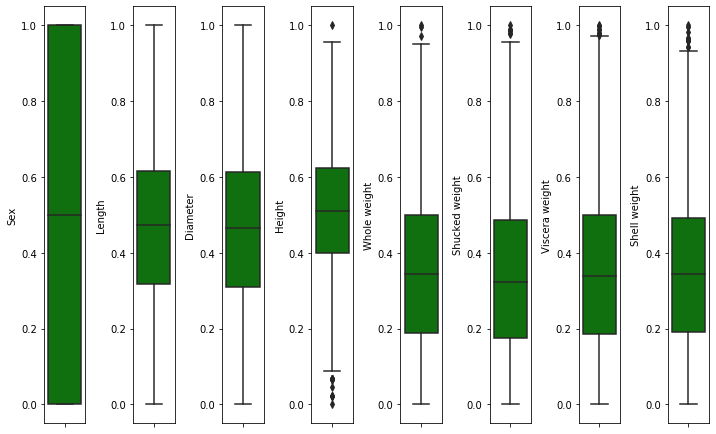

In [488]:
# lets check for outliers among all the columns after Data Preprocessing done
collist =X.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

We can see some outliers present , But are very close the Whiskers so no problem

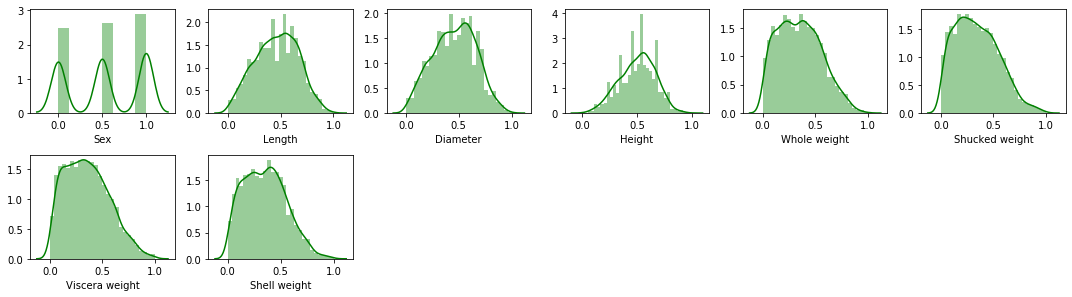

In [489]:
# Lets check the distribution
collist = X.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(X[collist[i]],color='green')
    plt.tight_layout()

Data is Normally Distributed after the PreProcessing is Done

## Lets Check for Best Random State 

In [490]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.23,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.558865225930669 on random state 139


In [491]:
#we got our best Random state 
#lets make test train split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.23,random_state= rand_state )

## Model selection :

In [492]:
#lets Choose Among this Five Models
lr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [493]:
#checking each model with Cross val score
model_list = [lr,knn,svr,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,x,y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.sqrt(r2_score(y_test,pred))-cvs.mean()
    print('Diffrence between cross val score and root mean squared error is :',difference)
    least_difference.append((m,difference))



LinearRegression()
Scores :
r2 score: 0.558865225930669
Cross Val score : 0.4109572814702254
Error :
mean absolute error : 1.4978072613559898
mean squared error :  4.029406936180201
root mean squared error : 2.0073382714879426
Difference :
Diffrence between cross val score and root mean squared error is : 0.33661560857506573


KNeighborsRegressor()
Scores :
r2 score: 0.5203975820779089
Cross Val score : 0.40123606833745723
Error :
mean absolute error : 1.541900647948164
mean squared error :  4.380777537796977
root mean squared error : 2.093030706367438
Difference :
Diffrence between cross val score and root mean squared error is : 0.3201498076525769


SVR()
Scores :
r2 score: 0.543015058428842
Cross Val score : 0.48069180129660527
Error :
mean absolute error : 1.4539772964475546
mean squared error :  4.174185309198335
root mean squared error : 2.0430823060264447
Difference :
Diffrence between cross val score and root mean squared error is : 0.25620375333026446


RandomForestRegressor

In [494]:
least_difference

[(LinearRegression(), 0.33661560857506573),
 (KNeighborsRegressor(), 0.3201498076525769),
 (SVR(), 0.25620375333026446),
 (RandomForestRegressor(), 0.312118404526669),
 (AdaBoostRegressor(), 0.4661224898916017)]

Lets choose support vector as our final model since it is having least diffrence betwen cross val score and R2 score

## Hyperparameter Tuning

In [495]:
# lets create the parameter list to pass in GridsearchCv
parameters = {'kernel' : ['linear', 'poly', 'rbf']}
gsv =GridSearchCV(estimator= svr,param_grid = parameters,cv =5)
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'kernel': ['linear', 'poly', 'rbf']})

In [496]:
gsv.best_params_

{'kernel': 'rbf'}

We got our best Parametr as 'rbf' which is default

## Creating a Final Model as Support Vector Regressor:

In [497]:
#using the results from Randomized search CV 
final_mod = SVR(kernel='rbf')
final_mod.fit(x_train,y_train)
pred = final_mod.predict(x_test)
print('Scores :')
print('r2 score:',r2_score(y_test,pred))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

Scores :
r2 score: 0.543015058428842
Error :
mean absolute error : 1.4539772964475546
mean squared error :  4.174185309198335
root mean squared error : 2.0430823060264447


We got our r2 score as 54% persent

## Saving the model:

In [498]:
#using joblib for serialization
import joblib
joblib.dump(final_mod,'abalone_final.obj')

['abalone_final.obj']

In [499]:
abalone_final = joblib.load('abalone_final.obj')

In [500]:
pred = abalone_final.predict(x_test)
r2_score(y_test,pred)

0.543015058428842